In [ ]:
#homework 8

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
## this sets some style parameters  
sns.set()

## Read in the data 

In [3]:
#pip install streamlit

#question 1
Get the country-specific covid case data from here. (Note pandas allows you to load a csv file from a URL. 
Make sure to use the "raw" link to the file on github.). Pick a country. Let  Yt  be the case count for day  t  since the outbreak onset for that country. That is, process the time series so that  t=0  is the first day with more than 0 cases. Then, fit a distributed lag linear model as follows.
Yt=α0+β1Yt−1+β2Yt−2+…+βkYt−5+ϵt

That is, see how the last five days predicts the current day. Report and interpret the coefficients.


In [14]:
dat= pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
df= dat.loc[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"],axis=1)


df["id"] = df.index
df=pd.melt(df,id_vars=['id'],var_name='metric', value_name='values')
df =df.drop('id', axis=1)
df

## get case counts instead of cumulative counts
df['y0']=df['values']-df['values'].shift(1)
df
## get the first non zero entry
df =df[df['values']!=0]
df['y1']=df['y0'].shift(1)
df['y2']=df['y1'].shift(1)
df['y3']=df['y2'].shift(1)
df['y4']=df['y3'].shift(1)
df['y5']=df['y4'].shift(1)
df


,metric,values,y0,y1,y2,y3,y4,y5
9,1/31/20,2,2.0,NaN,NaN,NaN,NaN,NaN
10,2/1/20,2,0.0,2.0,NaN,NaN,NaN,NaN
11,2/2/20,2,0.0,0.0,2.0,NaN,NaN,NaN
12,2/3/20,2,0.0,0.0,0.0,2.0,NaN,NaN
13,2/4/20,2,0.0,0.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...
813,4/14/22,15533012,65617.0,62586.0,84056.0,28705.0,53920.0,64421.0
814,4/15/22,15595302,62290.0,65617.0,62586.0,84056.0,28705.0,53920.0
815,4/16/22,15659835,64533.0,62290.0,65617.0,62586.0,84056.0,28705.0
816,4/17/22,15712088,52253.0,64533.0,62290.0,65617.0,62586.0,84056.0


In [15]:

model1 = smf.ols(formula = 'y0 ~ y1+y2+y3+y4+y5', data=df).fit()
model1.summary()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y0   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1158.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        08:20:44   Log-Likelihood:                -8719.4
No. Observations:                 804   AIC:                         1.745e+04
Df Residuals:                     798   BIC:                         1.748e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    657.3460    504.900      1.302      0.1

#report and interpret coefficients
intercept:
#Y(t-1): coefficient 0.45: the estimated expected change 0.45 in the daily case count for a 1 case increase in the previous day holidng the number of cases in other days (t-2, t-3, t-4, t-5) fixed. 


#y(t-2):coefficient 0.13: the estimated expected change 0.13 in the daily case count for a 1 case increase in the two days previous case count holidng the number of other days case count fixed (t-1, t-3, t-4, t-5)


#y(T-3):coefficient: 0:14 : the estimated expected change 0:14 in the daily case count for a 1 case increase in the three days previous case count holidng the number of other days case count fixed (t-1, t-2, t-4, t-5)


#y(t-4):coefficient 0.08 :  the estimated expected change 0.08 in the daily case count for a 1 case increase in the four days previous case count holidng the number of other days case count fixed (t-1, t-2, t-3, t-5)

##y(t-5):coefficient:0.18 : the estimated expected change 0.18 in the daily case count for a 1 case increase in the five days previous case count holidng the number of other days case count fixed (t-1,t-2, t-3, t-4)

In [30]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


#question 2 Refer to the previous question. Let A and B be your two countries. Create a plot of time versus prediction error for the following: a. fit the model on (all of) A and apply it to (all of) A, b. fit A on the first half of the time for A, apply it to all of A. This contrasts the forecasting error, a model fit using prior data applied to future data that didn't get to impact the fitting, with the training error.

In [71]:
## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
dat = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

y=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
y = np.asarray(y)  
## get case counts instead of cumulative counts
y = y[1 : y.size] - y[0 : (y.size - 1)]
## get the first non zero entry
y =  y[np.min(np.where(y !=  0)) : y.size]


y1= y[np.min(np.where(y !=  0))+5 : y.size]
x1=y[np.min(np.where(y !=  0))+4 : y.size-1]
x2=y[np.min(np.where(y !=  0))+3 : y.size-2]
x3=y[np.min(np.where(y !=  0))+2 : y.size-3]
x4=y[np.min(np.where(y !=  0))+1 : y.size-4]
x5=y[np.min(np.where(y !=  0)) : y.size-5]

data = {"Y": y1, "X1": x1, "X2": x2, "X3": x3,"X4": x4,"X5": x5}
trainFraction = 1

sample = np.random.uniform(size = y1.size) < trainFraction
trainingDat = df[sample]
testingDat = df[~sample]

In [74]:
results = smf.ols('Y ~ X1 + X2 + X3  + X4 +X5', data = trainingDat).fit()
print(results.summary2())


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.878     
Dependent Variable: Y                AIC:                17450.8613
Date:               2022-04-19 08:47 BIC:                17478.9989
No. Observations:   804              Log-Likelihood:     -8719.4   
Df Model:           5                F-statistic:        1158.     
Df Residuals:       798              Prob (F-statistic): 0.00      
R-squared:          0.879            Scale:              1.5512e+08
--------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
Intercept  657.3460  504.9001   1.3019  0.1933  -333.7431  1648.4351
X1           0.4507    0.0351  12.8427  0.0000     0.3818     0.5196
X2           0.1283    0.0384   3.3375  0.0009     0.0528     0.2037
X3           0.1383    0.0384   3.5998  0.0003     0.0629   

In [75]:

yhat= results.params[0]+results.params[1]*x1+results.params[2]*x2+results.params[3]*x3+results.params[4]*x4+results.params[5]*x5

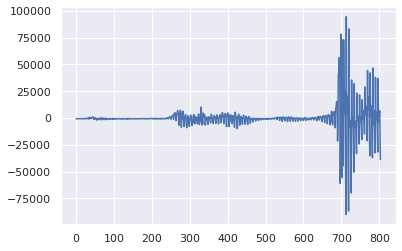

In [76]:
e=y1-yhat

plt.plot(e)

In [ ]:
#another way to solve this quesition 2A:

In [97]:


#part a
dat= pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

## Get Italy, drop everyrthing except dates, convert to long (unstack converts to tuple)
dt= dat.loc[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"],axis=1)


dt["id"] = dt.index
dt=pd.melt(dt,id_vars=['id'],var_name='metric', value_name='values')
dt =dt.drop(['id','metric'], axis=1)
dt

## get case counts instead of cumulative counts
dt['t']=dt['values']-dt['values'].shift(1)
dt
## get the first non zero entry
dt =dt[dt['values']!=0]
dt=dt.drop('values',axis=1)
dt



,t
9,2.0
10,0.0
11,0.0
12,0.0
13,0.0
...,...
813,65617.0
814,62290.0
815,64533.0
816,52253.0


In [77]:
##Q2B

X = df.values
print(X[0])
train_size = int(len(X) * 0.5)
train, test = X[0:train_size], X[:]

[0 0 0 0 0 2]


In [78]:

train_X1, train_X2,train_X3,train_X4,train_X5,train_Y = train[:,0], train[:,1], train[:,2], train[:,3], train[:,4], train[:,5]
test_X1, test_X2,test_X3,test_X4,test_X5,test_Y = test[:,0], test[:,1], test[:,2], test[:,3], test[:,4], test[:,5]


In [79]:
data_train = {"Ytr": train_Y, "X1tr": train_X1, "X2tr": train_X2, "X3tr": train_X3,"X4tr": train_X4,"X5tr": train_X5}

df_train = pd.DataFrame(data_train)

data_test = {"Yte": test_Y, "X1tr": test_X1, "X2tr": test_X2, "X3tr": test_X3,"X4tr": test_X4,"X5tr": test_X5}

df_test = pd.DataFrame(data_test)

In [80]:
print(train_X1.size)
print(train_X2.size)
print(train_X3.size)
print(train_X4.size)
print(train_X5.size)
print(train_Y.size)

402
402
402
402
402
402


In [81]:
resultstr = smf.ols('train_Y ~ train_X1+train_X2+train_X3+train_X4+train_X5', data = df_train).fit()
print(resultstr.summary2())

print (resultstr.params)

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.965     
Dependent Variable: train_Y          AIC:                7171.5319 
Date:               2022-04-19 08:48 BIC:                7195.5106 
No. Observations:   402              Log-Likelihood:     -3579.8   
Df Model:           5                F-statistic:        2242.     
Df Residuals:       396              Prob (F-statistic): 7.11e-288 
R-squared:          0.966            Scale:              3.2266e+06
--------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
Intercept    -2.4561  115.8964  -0.0212  0.9831  -230.3053  225.3930
train_X1      0.3729    0.0456   8.1830  0.0000     0.2833    0.4624
train_X2     -0.1194    0.0655  -1.8235  0.0690    -0.2481    0.0093
train_X3     -0.0572    0.0659  -0.8677  0.3861    -0.1867  

In [82]:

yhattr= resultstr.params[0]+resultstr.params[1]*test_X1+resultstr.params[2]*test_X2+resultstr.params[3]*test_X3+resultstr.params[4]*test_X4+resultstr.params[5]*test_X5

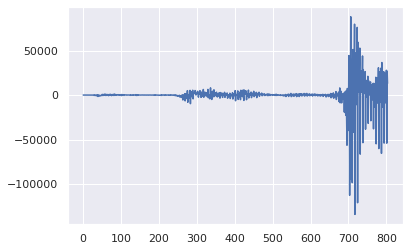

In [83]:
data_test = {"Yte": test_Y, "X1tr": test_X1, "X2tr": test_X2, "X3tr": test_X3,"X4tr": test_X4,"X5tr": test_X5}

df_test = pd.DataFrame(data_test)

e = test_Y- yhattr
plt.plot(e)

#question 3 
Plot the errors over time for applying the model from country A and applying it to a new country, B that you pick. This is out of sample error.

In [84]:

yb=dat[dat['Country/Region'] == 'Afghanistan'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
yb = np.asarray(yb)  
## get case counts instead of cumulative counts
yb = yb[1 : yb.size] - yb[0 : (yb.size - 1)]

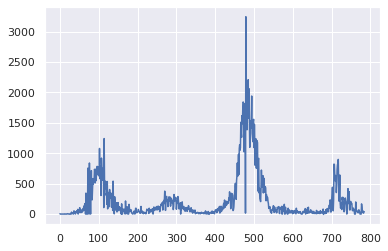

In [85]:
yb =  yb[np.min(np.where(yb !=  0)) : yb.size]
plt.plot(yb)

In [86]:
yb1= yb[np.min(np.where(yb !=  0))+5 : yb.size]
xb1=yb[np.min(np.where(yb !=  0))+4 : yb.size-1]
xb2=yb[np.min(np.where(yb !=  0))+3 : yb.size-2]
xb3=yb[np.min(np.where(yb !=  0))+2 : yb.size-3]
xb4=yb[np.min(np.where(yb !=  0))+1 : yb.size-4]
xb5=yb[np.min(np.where(yb !=  0)) : yb.size-5]
data2 = {"Yb": yb1, "Xb1": xb1, "Xb2": xb2, "Xb3": xb3,"Xb4": xb4,"Xb5": xb5}
print(xb1.size)
print(xb2.size)
print(xb3.size)
print(xb4.size)
print(xb5.size)
print(yb1.size)
df2 = pd.DataFrame(data2)
df2

780
780
780
780
780
780


,Yb,Xb1,Xb2,Xb3,Xb4,Xb5
0,0,0,0,0,0,5
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
775,57,38,116,167,0,0
776,21,57,38,116,167,0
777,14,21,57,38,116,167
778,31,14,21,57,38,116


In [87]:

ybhat= results.params[0]+results.params[1]*xb1+results.params[2]*xb2+results.params[3]*xb3+results.params[4]*xb4+results.params[5]*xb5

In [88]:
eb = yb1- ybhat

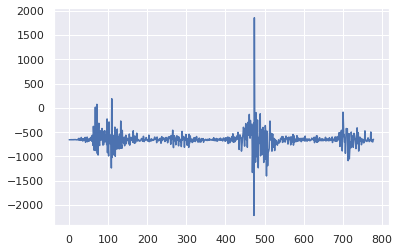

In [89]:
plt.plot(eb)

#question 4 
Consider the covid data from the previous questions. Let  Zt=I(Yt>Yt−1) . That is,  Zt  is 1 if cases went up on day  t  and  0  otherwise. Consider the following Markovian logit model:
logit{P(Zt=1)}=α0+β1Zt−1+β2Zt−2+β3Zt−3+β4Zt−4+β4Zt−5 
In other words, how does whether or not the previous five days case values predict whether or not the number of cases will go up or down? Report and interpret your coefficients.

In [90]:
##Q4
y=dat[dat['Country/Region'] == 'Italy'].drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).unstack()
## convert from tuple to array
y = np.asarray(y)  
## get case counts instead of cumulative counts
y = y[1 : y.size] - y[0 : (y.size - 1)]
y =  y[np.min(np.where(y !=  0)) : y.size]

y1= y[np.min(np.where(y !=  0))+5 : y.size]
x1=y[np.min(np.where(y !=  0))+4 : y.size-1]
x2=y[np.min(np.where(y !=  0))+3 : y.size-2]
x3=y[np.min(np.where(y !=  0))+2 : y.size-3]
x4=y[np.min(np.where(y !=  0))+1 : y.size-4]
x5=y[np.min(np.where(y !=  0)) : y.size-5]


yl1=y1-x1
xl1=x1-x2
xl2=x2-x3
xl3=x3-x4
xl4=x4-x5
xl5=[]
for i in range(x5.size):
    if i ==0:
        xl5.append(x5[i])
    else:
        xl5.append(x5[i]-y1[i-1])

yc1=[]
for i in yl1:
    if i >0:
        yc1.append(1)
    else:
        yc1.append(0)
x1c=[]
for i in xl1:
    if i >0:
        x1c.append(1)
    else:
        x1c.append(0)
x2c=[]
for i in xl2:
    if i >0:
        x2c.append(1)
    else:
        x2c.append(0)
x3c=[]
for i in xl3:
    if i >0:
        x3c.append(1)
    else:
        x3c.append(0)
x4c=[]
for i in xl4:
    if i >0:
        x4c.append(1)
    else:
        x4c.append(0)
x5c=[]
for i in xl5:
    if i >0:
        x5c.append(1)
    else:
        x5c.append(0)
        
datac = {"Y": yc1, "X1": x1c, "X2": x2c, "X3": x3c,"X4": x4c,"X5": x5c}

dfc = pd.DataFrame(datac)
dfc


,Y,X1,X2,X3,X4,X5
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
799,1,0,1,0,0,1
800,0,1,0,1,0,0
801,1,0,1,0,1,0
802,0,1,0,1,0,1


In [91]:
x = dfc[['X1', 'X2', 'X3', 'X4', 'X5']]
y = dfc[['Y']]

In [92]:
x = sm.tools.add_constant(x)

xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

## this sets some style parameters  
sns.set()

In [94]:
fit = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()

Optimization terminated successfully.
         Current function value: 0.634921
         Iterations 5


In [95]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  804
Model:                          Logit   Df Residuals:                      798
Method:                           MLE   Df Model:                            5
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                 0.08386
Time:                        08:48:51   Log-Likelihood:                -510.48
converged:                       True   LL-Null:                       -557.20
Covariance Type:            nonrobust   LLR p-value:                 1.266e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5718      0.245     -2.335      0.020      -1.052      -0.092
X1             0.8581      0.165      5.195      0.000       0.534       1.182
X2             0.0899      0.163      0.550      0.582      -0.230       0.410
X3            -0.3456      0.163     -2.124      0.034      -0.664      -0.027
X4            -0.3930      0.158     -2.491      0.013      -0.702      -0.084
X5             0.9561      0.189      5.054      0.000       0.585       1.327
==============================================================================
"""